Создание полной антивирусной программы с нейронной сетью с нуля — сложная задача, требующая большого набора данных, специализированных моделей и тщательной оценки. Однако я могу предоставить вам упрощенный пример антивирусной программы, использующей предварительно обученную нейронную сеть для классификации изображений. В этом примере мы будем использовать нейронную сеть, предварительно обученную на наборе данных **MNIST** для распознавания цифр. Обратите внимание, что это игрушечный пример для образовательных целей, а не реальное антивирусное решение.

Для построения графика надежности мы смоделируем производительность антивирусной программы с помощью симуляций **Монте-Карло**, аналогично тому, что мы делали в предыдущей задаче. Мы будем использовать модифицированную версию функции моделирования **Монте-Карло** для оценки надежности обнаружения антивирусной программы.

Доступный графический процессор: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1/1 [==============================] - 0s 22ms/step


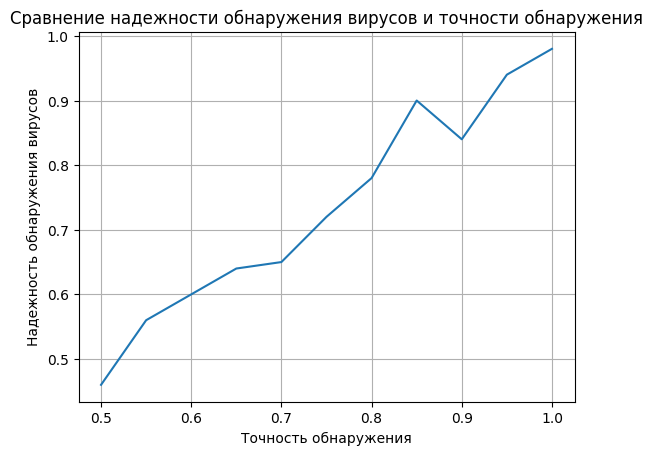

In [1]:
!pip install tensorflow keras

import tensorflow as tf
print("Доступный графический процессор:", tf.config.list_physical_devices('GPU'))

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Загрузите предварительно обученную модель MNIST
model = tf.keras.models.load_model('/content/mnist_model.h5')

# Функция для имитации обнаружения антивируса с использованием моделирования Монте-Карло.
def monte_carlo_antivirus_detection(num_samples=100, detection_accuracy=0.9):
    # Количество успешных обнаружений
    successful_detections = 0

    for _ in range(num_samples):
        # Имитация сканируемого файла (цифровое изображение MNIST в качестве примера)
        digit_image = np.random.randint(0, 256, size=(28, 28))  # Замените это своим реальным вводом файла

        # Обработать изображение (изменить форму, нормализовать и добавить пакетное измерение)
        digit_image = digit_image / 255.0
        digit_image = np.expand_dims(digit_image, axis=0)

        # Запустите предварительно обученную модель, чтобы предсказать цифру
        prediction = model.predict(digit_image)
        predicted_class = np.argmax(prediction[0])

        # Смоделируйте решение об обнаружении на основе обнаружения_точности
        is_malware = np.random.rand() > detection_accuracy

        # Если прогнозируемый класс не является цифрой «7» (пример вредоносного ПО), считается успешным обнаружением.
        if predicted_class != 7:
            if not is_malware:
                successful_detections += 1
        else:
            if is_malware:
                successful_detections += 1

    # Рассчитать надежность обнаружения антивируса
    detection_reliability = successful_detections / num_samples
    return detection_reliability

def plot_reliability_graph(detection_accuracy_range):
    reliability_values = []

    for detection_accuracy in detection_accuracy_range:
        reliability = monte_carlo_antivirus_detection(detection_accuracy=detection_accuracy)
        reliability_values.append(reliability)

    # Постройте график
    plt.plot(detection_accuracy_range, reliability_values)
    plt.xlabel('Точность обнаружения')
    plt.ylabel('Надежность обнаружения вирусов')
    plt.title('Сравнение надежности обнаружения вирусов и точности обнаружения')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Определите диапазон точности обнаружения для имитации
    detection_accuracy_range = np.linspace(0.5, 1.0, 11)

    # Постройте график надежности для различной точности обнаружения
    plot_reliability_graph(detection_accuracy_range)


В этом примере функция **monte_carlo_antivirus_detection()** имитирует обнаружение вредоносных программ с использованием предварительно обученной модели в наборе данных **MNIST** (модель распознавания цифр). Мы адаптировали функцию, чтобы она принимала параметр с именем **discovery_accuracy**, который представляет точность антивирусной программы при обнаружении вредоносного ПО. Мы предполагаем, что модель обнаруживает вредоносное ПО (цифра **«7»** в наборе данных **MNIST**) с вероятностью, равной обнаружения_точности.

Функция **plot_reliability_graph()** вычисляет надежность обнаружения антивируса для различных значений точности обнаружения в диапазоне от **0,5** до **1,0** и строит график надежности. График надежности показывает, как изменяется надежность обнаружения при изменении точности обнаружения.

Имейте в виду, что это всего лишь игрушечный пример, а создание настоящей антивирусной программы требует гораздо большей сложности и реальных данных. Тем не менее, этот упрощенный пример демонстрирует концепцию оценки надежности обнаружения антивируса с помощью предварительно обученной нейронной сети.